## Programming with Python for Data Science

The data from various tye of files can be read using below mentioned methods
    
    from sqlalchemy import create_engine
    engine = create_engine('sqlite:///:memory:')
    sql_dataframe  = pd.read_sql_table('my_table', engine, columns=['ColA', 'ColB'])
    
    xls_dataframe  = pd.read_excel('my_dataset.xlsx', 'Sheet1', na_values=['NA', '?'])
    
    json_dataframe = pd.read_json('my_dataset.json', orient='columns')
    
    csv_dataframe  = pd.read_csv('my_dataset.csv', sep=',')
    
    table_dataframe= pd.read_html('http://page.com/with/table.html')[0]
    
    Note the return type of .read_html(), it is a Python list of dataframes, one per HTML table found on the webpage.

sep : str, default ‘,’

    Delimiter to use. If sep is None, will try to automatically determine this. Separators longer than 1 character and different from '\s+' will be interpreted as regular expressions, will force use of the python parsing engine and will ignore quotes in the data. Regex example: '\r\t'

delimiter : str, default None

    Alternative argument name for sep.

header : int or list of ints, default ‘infer’

    Row number(s) to use as the column names, and the start of the data. Default behavior is as if set to 0 if no names passed, otherwise None. Explicitly pass header=0 to be able to replace existing names. The header can be a list of integers that specify row locations for a multi-index on the columns e.g. [0,1,3]. Intervening rows that are not specified will be skipped (e.g. 2 in this example is skipped). Note that this parameter ignores commented lines and empty lines if skip_blank_lines=True, so header=0 denotes the first line of data rather than the first line of the file.

names : array-like, default None

    List of column names to use. If file contains no header row, then you should explicitly pass header=None. Duplicates in this list are not allowed unless mangle_dupe_cols=True, which is the default.

index_col : int or sequence or False, default None

    Column to use as the row labels of the DataFrame. If a sequence is given, a MultiIndex is used. If you have a malformed file with delimiters at the end of each line, you might consider index_col=False to force pandas to _not_ use the first column as the index (row names)

skipinitialspace : boolean, default False
    
    Skip spaces after delimiter.

skiprows : list-like or integer, default None
    
    Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file

na_values : scalar, str, list-like, or dict, default None
    
    Additional strings to recognize as NA/NaN. If dict passed, specific per-column NA values. By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’,

thousands : str, default None
    
    Thousands separator

decimal : str, default ‘.’
    
    Character to recognize as decimal point (e.g. use ‘,’ for European data).

To convert any dataframe to any other type of file

    my_dataframe.to_sql('table', engine)
    my_dataframe.to_excel('dataset.xlsx')
    my_dataframe.to_json('dataset.json')
    my_dataframe.to_csv('dataset.csv')

The .loc[] method selects by column label, 

.iloc[] selects by column index, and 

.ix[] can be used whenever you want to use a hybrid approach of either.

#### Produces a series object:
    df.recency
    df['recency']
    df.loc[:, 'recency']
    df.iloc[:, 0]
    df.ix[:, 0]

#### Produces a dataframe object:
    df[['recency']]
    df.loc[:, ['recency']]
    df.iloc[:, [0]]

The difference between the two is, if a pair of big brackets is used inside the .loc operator the return type is a Data frame and if not a Series


In pandas the logical operators 'or' and 'and' are not available as they create ambiguity instead logical bitwise operators can be used i.e. | and &

#### Textual Categorical-Features

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            import pandas as pd
ordered_satisfaction = ['Very Unhappy', 'Unhappy', 'Neutral', 'Happy', 'Very Happy']
df = pd.DataFrame({'satisfaction':['Mad', 'Happy', 'Unhappy', 'Neutral']})
df.satisfaction = df.satisfaction.astype("category",
                  ordered=True,
                  categories=ordered_satisfaction
).cat.codes
df

If the column data in the data frame is ordinal and it is intended to classfy them in a order then change the data type to category.

The optional arguments are ordered and categories
    
    If order is true then it will arrange the return type in incerasing order.
    categories will take a sequence of odering

In [ ]:
import pandas as pd

df = pd.DataFrame({'vertebrates':['Bird',
'Bird',
'Mammal',
'Fish',
'Amphibian',
'Reptile',
'Mammal']})

df.vertebrates = df.vertebrates.astype("category").cat.codes
df

In [ ]:
import pandas as pd

df = pd.DataFrame({'vertebrates':['Bird',
'Bird',
'Mammal',
'Fish',
'Amphibian',
'Reptile',
'Mammal']})

df['new_vertebrates'] = df.vertebrates.astype("category").cat.codes
df

In [ ]:
df = pd.DataFrame({'vertebrates':['Bird',
'Bird',
'Mammal',
'Fish',
'Amphibian',
'Reptile',
'Mammal']})
df = pd.get_dummies(df,columns=['vertebrates'])
df

These newly created features are called boolean features because the only values they can contain are either 0 for non-inclusion, or 1 for inclusion. Pandas .get_dummies() method allows you to completely replace a single, nominal feature with multiple boolean indicator features. 

In [ ]:
import sys
sys.version

#### Pure Textual Features

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
"Authman ran faster than Harry because he is an athlete.",
"Authman and Harry ran faster and faster."]

bow = CountVectorizer()
X = bow.fit_transform(corpus) # Sparse Matrix

words = bow.get_feature_names()
#['an', 'and', 'athlete', 'authman', 'because', 'faster', 'harry', 'he', 'is', 'ran', 'than']

print (X.toarray())
print(words)

In the above example 

    corpus is the given sentence
    bow is the bag of words
    features are the names of the columns
    x is the sparse matrix that is created to save memory, i.e. if actual words are used to create the feature then the dataframe will be huge

#### Graphical Features

from scipy import misc #Load the image up

img = misc.imread('image.png')

img = img[::2, ::2] #Is the image too big? Resample it down by an order of magnitude

X = (img / 255.0).reshape(-1) #Scale colors from (0-255) to (0-1), then reshape to 1D array per pixel, e.g. grayscale if you had
color images and wanted to preserve all color channels, use .reshape(-1,3)

#### Wrangling Your Data

Python's None and np.nan are different and to test whether a variable is np.nan or not isnull() and .notnull() are used.These two methods work on both series and dataframe

#### .fillna() method 

DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)

    Value to use to fill holes
    methods are bfill, ffill, pad etc
    axis is 0 for index and 1 for columns
    limit:  this is the maximum number of consecutive NaN values to forward/backward fill.
    
DataFrame.interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction='forward', downcast=None, **kwargs)
    
    method are 'linear',‘time’, ‘index’, ‘values’, ‘nearest’, ‘zero’,‘slinear’, ‘quadratic’, ‘cubic’, ‘barycentric’, ‘krogh’, ‘polynomial’, ‘spline’, ‘piecewise_polynomial’, ‘from_derivatives’, ‘pchip’, ‘akima’
    
DataFrame.drop_duplicates(*args, **kwargs)
    
    subset : column label or sequence of labels, optional
             Only consider certain columns for identifying duplicates, by default use all of the columns
    
    keep : {‘first’, ‘last’, False}, default ‘first’
        first : Drop duplicates except for the first occurrence.
        last : Drop duplicates except for the last occurrence.
        False : Drop all duplicates.

Type Markdown and LaTeX:  α2α2 

First try to fill in missing data rather that deleting it. but if unable to fill it the use the .dropna() method.

    df = df.dropna(axis=0)  # remove any row with nans
    df = df.dropna(axis=1)  # remove any column with nans
    df = df.dropna(axis=0, thresh=4) # Drop any row that has at least 4 NON-NaNs within it:
To get rid of columns or features use,
    
    df = df.drop(labels=['Features', 'To', 'Delete'], axis=1) # Axis=1 for columns
    
To get rid of a row or index
    
    df = df.drop(labels=['ego', 'jealous', 'fear', axis = 0]) # Axis = 0 for rows
    
To drop duplicate records by comparing o features

    df = df.drop_duplicates(subset=['Feature_1', 'Feature_2'])
    
Chaining of operators is possible 
    
    df = df.dropna(axis=0, thresh=2).drop(labels=['ColA', axis=1]).drop_duplicates(subset=['ColB', 'ColC']).reset_index()

    



Pandas will automatically attempt to figure out the best data type to use for each series in your dataset. Most of the time it does this flawlessly, but other times it fails horribly! Particularly the .read_html() method is notorious for defaulting all series data types to Python objects.

    df.dtypes

        Date        object
        Name        object
        Gender      object
        Height      object
        Weight      object
        Age         object
        Job         object
        
    df.Date = pd.to_datetime(df.Date, errors='coerce')
    df.Height = pd.to_numeric(df.Height, errors='coerce')
    df.Weight = pd.to_numeric(df.Weight, errors='coerce')
    df.Age = pd.to_numeric(df.Age, errors='coerce')
    df.dtypes

        Date        datetime64
        Name        object
        Gender      object
        Height      float64
        Weight      float64
        Age         int64
        Job         object
        
The errors='coerce' parameter instructs Pandas to enter a NaN at any field where the conversion fails.

.unique() ethod gives all the unique values in a series
    
    df.Age.unique()

        array([7, 33, 27, 40, 22], dtype=int64)
    
    
.value_counts() method gives the count of all the unique values that are in a given column

    df.Age.value_counts()

        7      1
        22     5
        27     1
        33     2
        40     2
        dtype: int64

In [ ]:
import pandas as pd

df = pd.read_csv('tutorial.csv')
df

In [ ]:
df.info()

In [ ]:
df['col0'] = df['col0'].apply(str)

In [ ]:
df.info()

In [ ]:
df['new'] = df['col0'].str.split('.')
df['final'] = [i[0] for i in df['new']]
df['again'] = [i[1] for i in df['new']]
df

In [ ]:
df['col0'].apply(str)
df.info()

In [ ]:
df.loc[2:4, 'col3']

In [ ]:
df.describe()

In [ ]:
import pandas as pd

df = pd.read_csv('servo.data', names = ['motor', 'screw', 'pgain', 'vgain', 'class'])
df

In [ ]:
(df.vgain == 5).value_counts()

In [ ]:
((df.motor == 'E') & (df.screw == 'E')).value_counts()

In [ ]:
df[df.pgain == 4].vgain.mean()

import pandas as pd
import html5lib

df = pd.read_html('http://www.espn.com/nhl/statistics/player/_/stat/points/sort/points/year/2015/seasontype/2')[0]
df.drop_duplicates(subset=[1],inplace = True)
df.drop(labels = [0], axis = 0, inplace = True)
df.columns = df.iloc[0]
df = df.reindex(df.index.drop(1))
df.dropna(axis=0, thresh=4, inplace = True)
df.drop(labels = 'RK', axis = 1, inplace = True)
df.reset_index(inplace = True)
df.drop(labels = 'index',axis = 1, inplace = True)
df

df.shape

len(df.PCT.unique())

In [ ]:
import pandas as pd

df = pd.read_csv('census.data', names = ['education', 'age', 'capital-gain', 'race', 'capital-loss', 'hours-per-week', 'sex', 'classification'])
df

#### Plotting data using Matplotlib

In [ ]:
import pandas as pd

df = pd.read_csv(r'C:\Users\kkv1\Desktop\Python\DS\Microsoft ML\DAT210x-master\Module3\Datasets\wheat.data')
df

In [ ]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot') 
df['asymmetry'].plot.hist(alpha=0.8)
ax = plt.gca()
ax.set_ylabel('asymmetry')
ax.set_xlabel('asymmetry with a bin size of 10')

The histogram plot as an optional parameter call 'bins' if not given it automatically divides the given series or Dataframe into parts 

It also has a optional paratmeter called width which is the width of the bar

To differnt plots in the jupytenotebook make use of plt.figure otherwise it will keep on updating the same figure

In [ ]:
plt.figure()
df['asymmetry'].plot.hist(alpha=0.8, bins = 5, width = 0.5)
ax = plt.gca()
ax.set_ylabel('asymmetry')
ax.set_xlabel('asymmetry with a bin size of 10')
ax.legend()

In [ ]:
df.width.dtype

In [ ]:
df[['width', 'length']].plot.hist(width = 0.5)

Histogram can also be plotted on a Dataframe
Before plotting the histogram on the above Dataframe id columns need to be dropped coz the value in ID  coulumn is too high

In [ ]:
df.drop(labels = 'id', inplace = True, axis = 1)
df.plot.hist()

#### 2D Scatter plot

In [ ]:
df.plot.scatter(x = 'length', y = 'width', c=  'red')

This is your basic 2D scatter plot. Notice you have to call .scatter on a dataframe rather than a series, since two features are needed rather than just one. You also have to specify which features within the dataset you want graphed.

#### 3D scatter plot

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
matplotlib.style.use('ggplot') # Look Pretty
# If the above line throws an error, use plt.style.use('ggplot') instead

df = pd.read_csv(r'C:\Users\kkv1\Desktop\Python\DS\Microsoft ML\DAT210x-master\Module3\Datasets\wheat.data')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('length')
ax.set_ylabel('width')
ax.set_zlabel('area')

ax.scatter(df.length, df.width, df.area, c='r', marker='.')
plt.show()

#### Paralle Co-ordinates

Parallel coordinate plots are similar to scatter plots in that each axis maps to the ordered, numeric domain of a feature. But instead of having axes aligned in an orthogonal manner, parallel coordinates get their name due to their their axes being arranged vertically and in parallel. All that is just a fancy way of saying parallel coordinates are a bunch of parallel, labeled, numeric axes.

Each graphed observation is plotted as a polyline, a series of connected line segments. The joints of the polyline fall on each axis. Since each axis maps to the domain of a numeric feature, the resulting polyline fully describes the value of each of the observation's features.

They are a higher dimensionality visualization technique because they allow you to easily view observations with more than three dimensions simply by tacking on additional parallel coordinates.

However at some point, it becomes hard to comprehend the chart anymore due to the sheer number of axes and also potentially due to the number of observations. If you data has more than 10 features, parallel coordinates might not do it for you.

In [ ]:
from sklearn.datasets import load_iris
from pandas.tools.plotting import parallel_coordinates

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Look pretty...
matplotlib.style.use('ggplot')
# If the above line throws an error, use plt.style.use('ggplot') instead

# Load up SKLearn's Iris Dataset into a Pandas Dataframe
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names) 

df['target_names'] = [data.target_names[i] for i in data.target]

# Parallel Coordinates Start Here:
plt.figure()
parallel_coordinates(df, 'target_names')
plt.show()

#### Andrews plot

An Andrews plot, also known as Andrews curve, helps you visualize higher dimensionality, multivariate data by plotting each of your dataset's observations as a curve. The feature values of the observation act as the coefficients of the curve, so observations with similar characteristics tend to group closer to each other. Due to this, Andrews curves have some use in outlier detection.

Just as with Parallel Coordinates, every plotted feature must be numeric since the curve equation is essentially the product of the observation's features vector (transposed) and the vector: (1/sqrt(2), sin(t), cos(t), sin(2t), cos(2t), sin(3t), cos(3t), ...) to create a Fourier series.

In [ ]:
from sklearn.datasets import load_iris
from pandas.tools.plotting import andrews_curves

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Look pretty...
matplotlib.style.use('ggplot')
# If the above line throws an error, use plt.style.use('ggplot') instead

# Load up SKLearn's Iris Dataset into a Pandas Dataframe
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target_names'] = [data.target_names[i] for i in data.target]

# Andrews Curves Start Here:
plt.figure()
andrews_curves(df, 'target_names')
plt.show()

In [ ]:
df

In [ ]:
import numpy as np
df = df.groupby('target_names').agg({'petal length (cm)': np.average})
#df.drop(labels = 'target_names',axis = 0, inplace = True)
df

In [ ]:
df.index

plt.figure()
andrews_curves(df, 'target_names')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\kkv1\Desktop\Python\DS\Microsoft ML\DAT210x-master\Module3\Datasets\wheat.data')
area_perimeter = ['area','perimeter']
groove_asym = ['groove','asymmetry']
compact_width = ['compactness','width']
df1 = df[area_perimeter]
df2 = df[groove_asym]
df3 = df[compact_width]

In [ ]:
df1.plot.hist(alpha = 0.75)

In [ ]:
df2.plot.hist(alpha = 0.75)

In [ ]:
df2.groove.var()

In [ ]:
df2.asymmetry.var()

In [ ]:
df1.plot.scatter(x= 'area', y = 'perimeter')
df2.plot.scatter(x = 'groove', y = 'asymmetry')
df3.plot.scatter(x = 'compactness', y = 'width')

<IPython.core.display.Javascript object>


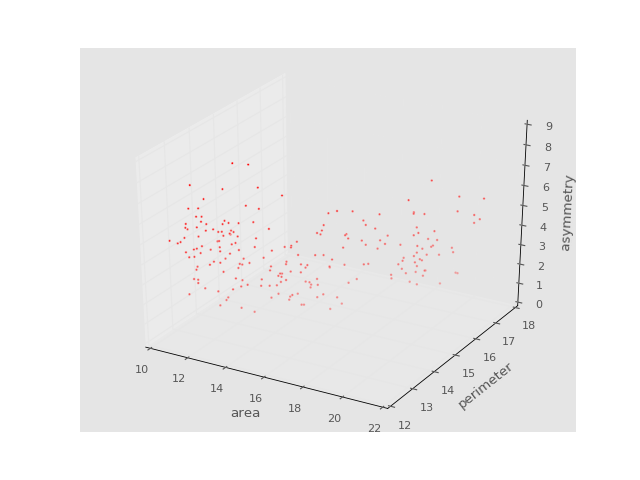

In [261]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
matplotlib.style.use('ggplot') # Look Pretty
# If the above line throws an error, use plt.style.use('ggplot') instead

df = pd.read_csv(r'C:\Users\kkv1\Desktop\Python\DS\Microsoft ML\DAT210x-master\Module3\Datasets\wheat.data')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('area')
ax.set_ylabel('perimeter')
ax.set_zlabel('asymmetry ')

ax.scatter(df.area, df.perimeter, df.asymmetry, c='r', marker='.')
plt.show()

<IPython.core.display.Javascript object>


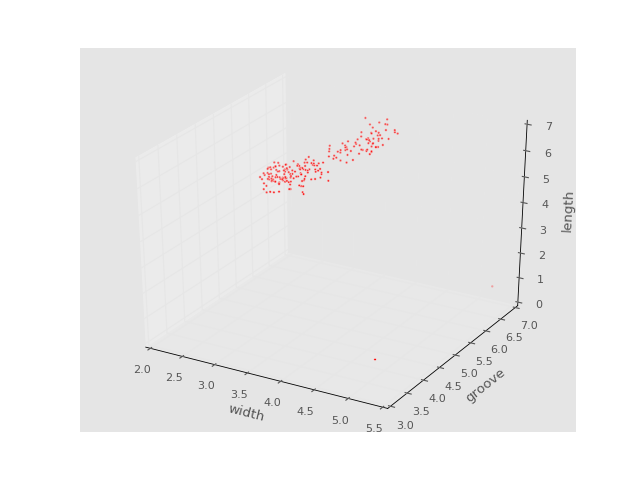

In [262]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('width')
ax.set_ylabel('groove')
ax.set_zlabel('length')

ax.scatter(df.width, df.groove, df.length , c='r', marker='.')
plt.show()

In [263]:
df.drop(['id','area','perimeter'], axis = 1, inplace = True)

In [264]:
df

,compactness,length,width,asymmetry,groove,wheat_type
0,0.8710,5.763,3.312,2.2210,5.220,kama
1,0.8811,5.554,3.333,1.0180,4.956,kama
2,0.9050,5.291,3.337,2.6990,4.825,kama
3,0.8955,5.324,3.379,2.2590,4.805,kama
4,0.9034,5.658,3.562,1.3550,5.175,kama
5,0.8951,5.386,3.312,2.4620,4.956,kama
6,0.8799,5.563,3.259,3.5860,5.219,kama
7,0.8911,5.420,3.302,2.7000,NaN,canadian
8,0.8747,6.053,3.465,2.0400,5.877,kama
9,0.8880,5.884,3.505,1.9690,5.533,kama


In [265]:
df.groupby('wheat_type')

<IPython.core.display.Javascript object>


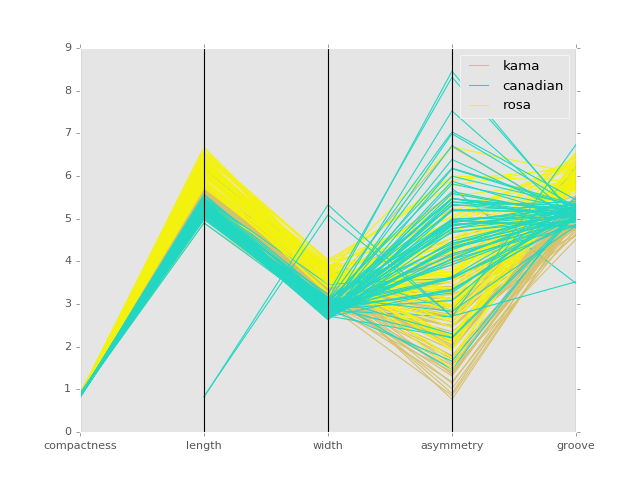

In [266]:
plt.figure()
parallel_coordinates(df, 'wheat_type')

<IPython.core.display.Javascript object>


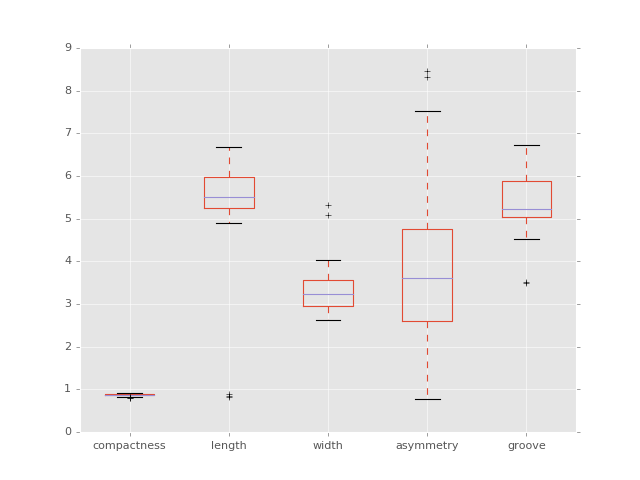

In [267]:
df.plot.box()

<IPython.core.display.Javascript object>


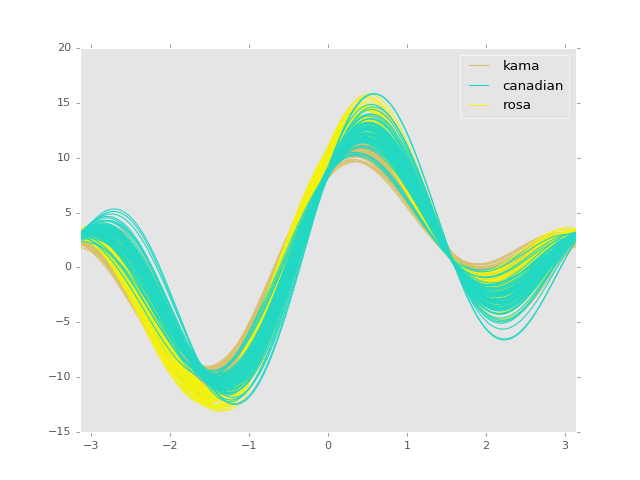

In [268]:
plt.figure()
andrews_curves(df, 'wheat_type')

In [271]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
matplotlib.style.use('ggplot') # Look Pretty
# If the above line throws an error, use plt.style.use('ggplot') instead

df = pd.read_csv(r'C:\Users\kkv1\Desktop\Python\DS\Microsoft ML\DAT210x-master\Module3\Datasets\wheat.data')
df.drop('id',axis = 1, inplace = True)

<IPython.core.display.Javascript object>


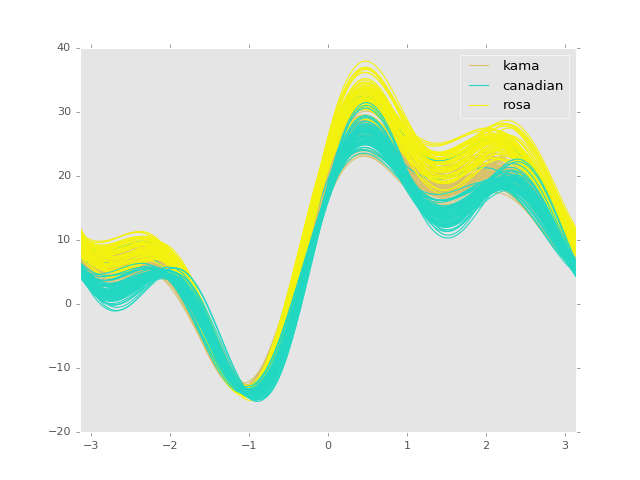

In [270]:
plt.figure()
andrews_curves(df, 'wheat_type')

####  Principal component analysis [PCA]

PCA is a Unsupervised learning algorithm which attempts to convert your possibly correlated features into a set of linearly uncorrelated ones.PCA falls into the group of dimensionality reduction algorithm.

If you have reason to believe your question has a simple answer, or that the features you've collected are actually many indirect observations of some inherent source you either cannot or do not know how to measure, then dimensionality reduction applies to your needs.


